# MNIST Handwritten Image Classification

## Importing Libraries and Datasets

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
import random
import time

In [2]:
np.random.seed(0)

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:

print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(10000,)


## Data Visualisation

In [5]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28, 28)), "The dimensions of the images are not 28*28."
assert(X_test.shape[1:] == (28, 28)), "The dimensions of the images are not 28*28."

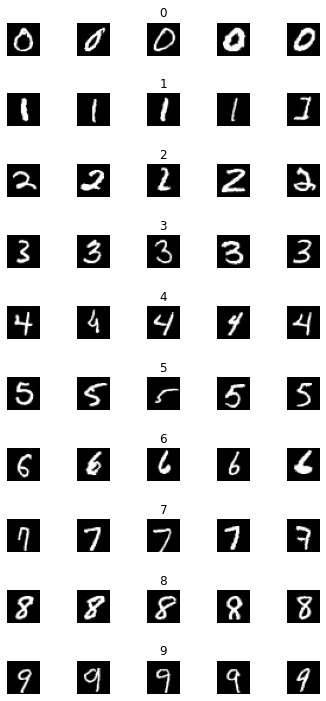

In [6]:
num_of_samples = []

cols = 5
num_classes = 10

fig, axes = plt.subplots(nrows = num_classes, ncols = cols, figsize = (5, 10))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axes[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap = plt.get_cmap("gray"))
        axes[j][i].axis("off")
        if i == 2:
            axes[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

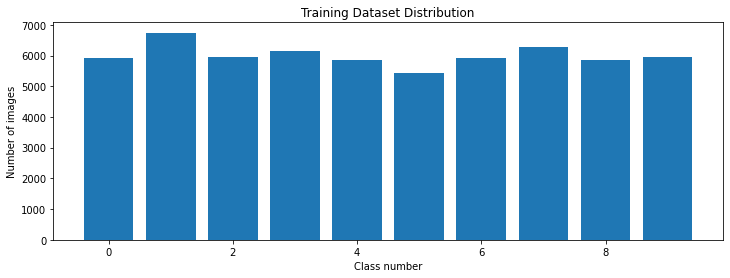

In [7]:
print(num_of_samples)
plt.figure(figsize = (12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Training Dataset Distribution")
plt.xlabel("Class number")
plt.ylabel("Number of images")

## Pre-processing and one-hot-encoding

In [8]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [9]:
print(X_train.shape)

(60000, 28, 28)


In [10]:
X_train = X_train/255
X_test = X_test/255

In [11]:
#num_pixels = 784

In [12]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

## LeNET Model

In [13]:
def lenet_model():
    model = Sequential()
    model.add(Conv2D(30, (5,5), input_shape = (28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Conv2D(15, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(15, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Flatten())
    model.add(Dense(500, activation = 'relu'))
    model.add(Dense(500, activation = 'relu'))
    model.add(Dense(500, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation = 'softmax'))
    model.compile(Adam(lr = 0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [14]:
model = lenet_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 15)          2040      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 15)          0         
_________________________________________________________________
flatten (Flatten)            (None, 15)                0

In [15]:
start_time = time.time()
history = model.fit(X_train, y_train, epochs = 10, validation_split = 0.1, batch_size = 500, verbose = 1, shuffle = True)
print("Time Taken: {}".format(time.time() - start_time))

Epoch 1/10
108/108 [==============================] - 1s 9ms/step - loss: 1.2472 - accuracy: 0.5406 - val_loss: 0.4292 - val_accuracy: 0.8585
Epoch 2/10
108/108 [==============================] - 1s 7ms/step - loss: 0.3334 - accuracy: 0.9013 - val_loss: 0.1742 - val_accuracy: 0.9492
Epoch 3/10
108/108 [==============================] - 1s 7ms/step - loss: 0.2062 - accuracy: 0.9400 - val_loss: 0.1610 - val_accuracy: 0.9502
Epoch 4/10
108/108 [==============================] - 1s 7ms/step - loss: 0.1700 - accuracy: 0.9499 - val_loss: 0.1334 - val_accuracy: 0.9623
Epoch 5/10
108/108 [==============================] - 1s 7ms/step - loss: 0.1529 - accuracy: 0.9566 - val_loss: 0.1123 - val_accuracy: 0.9677
Epoch 6/10
108/108 [==============================] - 1s 7ms/step - loss: 0.1409 - accuracy: 0.9573 - val_loss: 0.1521 - val_accuracy: 0.9560
Epoch 7/10
108/108 [==============================] - 1s 7ms/step - loss: 0.1421 - accuracy: 0.9581 - val_loss: 0.1353 - val_accuracy: 0.9590
Epoch 

In [16]:
model.save('model.h5')

In [17]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


Text(0.5, 0, 'epoch')

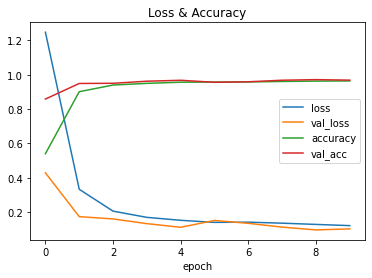

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['loss', 'val_loss', 'accuracy', 'val_acc'])
plt.title('Loss & Accuracy')
plt.xlabel('epoch')

In [21]:
score = model.evaluate(X_test, y_test, verbose = 0)
print(type(score))
print('Test Score:', score[0])
print(['Test Accuracy:', score[1]])

<class 'list'>
Test Score: 0.125699982047081
['Test Accuracy:', 0.9634000062942505]


## Testing Sample Image

In [22]:
import cv2

In [23]:
img = cv2.imread('sample1.jpeg')

In [ ]:
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap = 'gray')

In [ ]:
image = cv2.bitwise_not(img)
plt.imshow(image, cmap = 'gray')

In [ ]:
image = image/255
image = image.reshape(1, 28, 28, 1)

In [ ]:
prediction = model.predict_classes(image)
print(str(prediction))